In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Read and Filter Data

In [2]:
zip_train = pd.read_csv("zip.train.csv", header=None)
zip_test = pd.read_csv("zip.test.csv", header=None)
col_names = ["Y"]
col_names.extend(["X%d" % i for i in range(zip_train.shape[1]-1)])
zip_train.columns = col_names
zip_test.columns = col_names
zip_train = zip_train[zip_train["Y"].isin([2, 7])]
zip_test = zip_test[zip_test["Y"].isin([2, 7])]
zip_train.head()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,...,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,...,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,...,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Exploratory Data Analysis

In [3]:
zip_train.shape

(1376, 257)

In [11]:
summary = zip_train.describe()
summary

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255
count,1376.00000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,4.34375,-0.984251,-0.922622,-0.837593,-0.707725,-0.516504,-0.337713,-0.215398,-0.177012,-0.236985,...,-0.459176,-0.328480,-0.533847,-0.822799,-0.905086,-0.889243,-0.849907,-0.852942,-0.907160,-0.972828
std,2.49602,0.105798,0.307493,0.439262,0.549117,0.656989,0.719407,0.749200,0.768320,0.752911,...,0.691796,0.754303,0.667315,0.431136,0.349080,0.367509,0.432005,0.429968,0.335022,0.148830
min,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-0.979000,-0.638000,-0.344000,-0.281500,-0.432000,...,-0.941500,-0.761500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.00000,-1.000000,-1.000000,-1.000000,-0.684000,-0.047250,0.280500,0.494500,0.555000,0.493250,...,0.119750,0.435750,-0.097750,-0.992000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,7.00000,0.412000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


In [5]:
zip_train.corr().round(2)

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255
Y,1.00,0.08,0.13,0.16,0.18,0.14,0.05,-0.03,-0.03,0.12,...,0.14,0.50,0.40,0.03,-0.19,-0.27,-0.32,-0.32,-0.26,-0.17
X0,0.08,1.00,0.71,0.40,0.22,0.10,0.05,0.02,0.01,0.02,...,0.12,0.02,-0.04,-0.02,-0.01,-0.02,-0.04,-0.04,-0.03,-0.02
X1,0.13,0.71,1.00,0.77,0.45,0.23,0.12,0.04,-0.00,-0.00,...,0.17,0.04,-0.07,-0.05,-0.03,-0.05,-0.06,-0.05,-0.03,-0.03
X2,0.16,0.40,0.77,1.00,0.75,0.43,0.24,0.12,0.04,0.02,...,0.22,0.08,-0.06,-0.06,-0.03,-0.05,-0.08,-0.07,-0.04,-0.03
X3,0.18,0.22,0.45,0.75,1.00,0.74,0.44,0.24,0.12,0.07,...,0.32,0.15,-0.04,-0.06,-0.04,-0.05,-0.08,-0.07,-0.03,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X251,-0.27,-0.02,-0.05,-0.05,-0.05,-0.05,0.01,0.12,0.25,0.24,...,0.02,-0.05,0.06,0.41,0.79,1.00,0.75,0.39,0.17,0.02
X252,-0.32,-0.04,-0.06,-0.08,-0.08,-0.07,0.02,0.16,0.29,0.29,...,-0.02,-0.13,-0.05,0.19,0.43,0.75,1.00,0.72,0.33,0.08
X253,-0.32,-0.04,-0.05,-0.07,-0.07,-0.04,0.06,0.19,0.29,0.24,...,-0.09,-0.18,-0.11,0.06,0.23,0.39,0.72,1.00,0.68,0.22
X254,-0.26,-0.03,-0.03,-0.04,-0.03,0.01,0.08,0.16,0.21,0.16,...,-0.09,-0.16,-0.12,-0.01,0.09,0.17,0.33,0.68,1.00,0.64


7


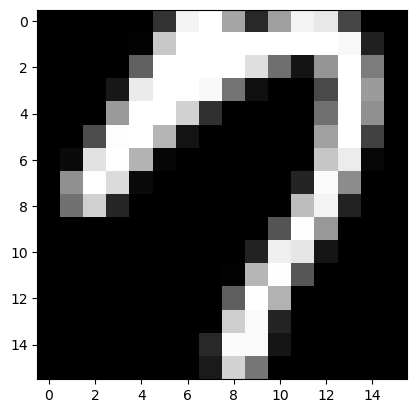

In [6]:
image_row = 1
image_arr = zip_train.iloc[image_row, 1:]
image_arr = image_arr.values.reshape((16, 16))
plt.gray()
plt.imshow(image_arr)
print(zip_train["Y"].iloc[image_row])

# Training Error

## Linear Regression

In [7]:
y = zip_train["Y"]
X = zip_train.drop(columns=['Y'])
model_lm = LinearRegression().fit(X, y)
fitted_lm = model_lm.predict(X)
fitted_lm = 2 + 5 * (fitted_lm >= 4.5)
train_error_lm = np.mean(fitted_lm != y)
print("Linear Regression training error = %0.05f"%(train_error_lm))

Linear Regression training error = 0.00073


## KNN

In [8]:
k_choices = list(range(1, 16, 2))
train_errors_knn = []
models_knn = []
for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    fitted_knn = knn.predict(X)
    err = np.mean(fitted_knn != y)
    train_errors_knn.append(err)
    models_knn.append(knn)

knn_idx_names = ["KNN%d"%(k) for k in k_choices]
train_errors_knn = pd.DataFrame(train_errors_knn, index=knn_idx_names, columns=["Training Error"])
train_errors_knn

,Training Error
KNN1,0.000000
KNN3,0.010174
KNN5,0.012355
KNN7,0.014535
KNN9,0.015988
KNN11,0.015988
KNN13,0.017442
KNN15,0.017442


# Testing Error

## Linear Regression

In [9]:
test_y = zip_test["Y"]
test_X = zip_test.drop(columns=["Y"])
pred_lm = model_lm.predict(test_X)
pred_lm = 2 + 5 * (pred_lm >= 4.5)
test_error_lm = np.mean(pred_lm != test_y)
print("Linear Regression testing error = %0.05f"%(test_error_lm))

Linear Regression testing error = 0.01739


## KNN

In [10]:
test_errors_knn = []
for knn in models_knn:
    pred_knn = knn.predict(test_X)
    err = np.mean(pred_knn != test_y)
    test_errors_knn.append(err)

test_errors_knn = pd.DataFrame(test_errors_knn, index=knn_idx_names, columns=["Testing Error"])
test_errors_knn

,Testing Error
KNN1,0.017391
KNN3,0.014493
KNN5,0.014493
KNN7,0.017391
KNN9,0.017391
KNN11,0.017391
KNN13,0.020290
KNN15,0.020290
